In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df_creditcarddata = pd.read_csv("UCI_Credit_Card.csv")
df_creditcarddata.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [3]:
df_creditcarddata.shape

(30000, 25)

In [4]:
df_creditcarddata.dtypes




ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

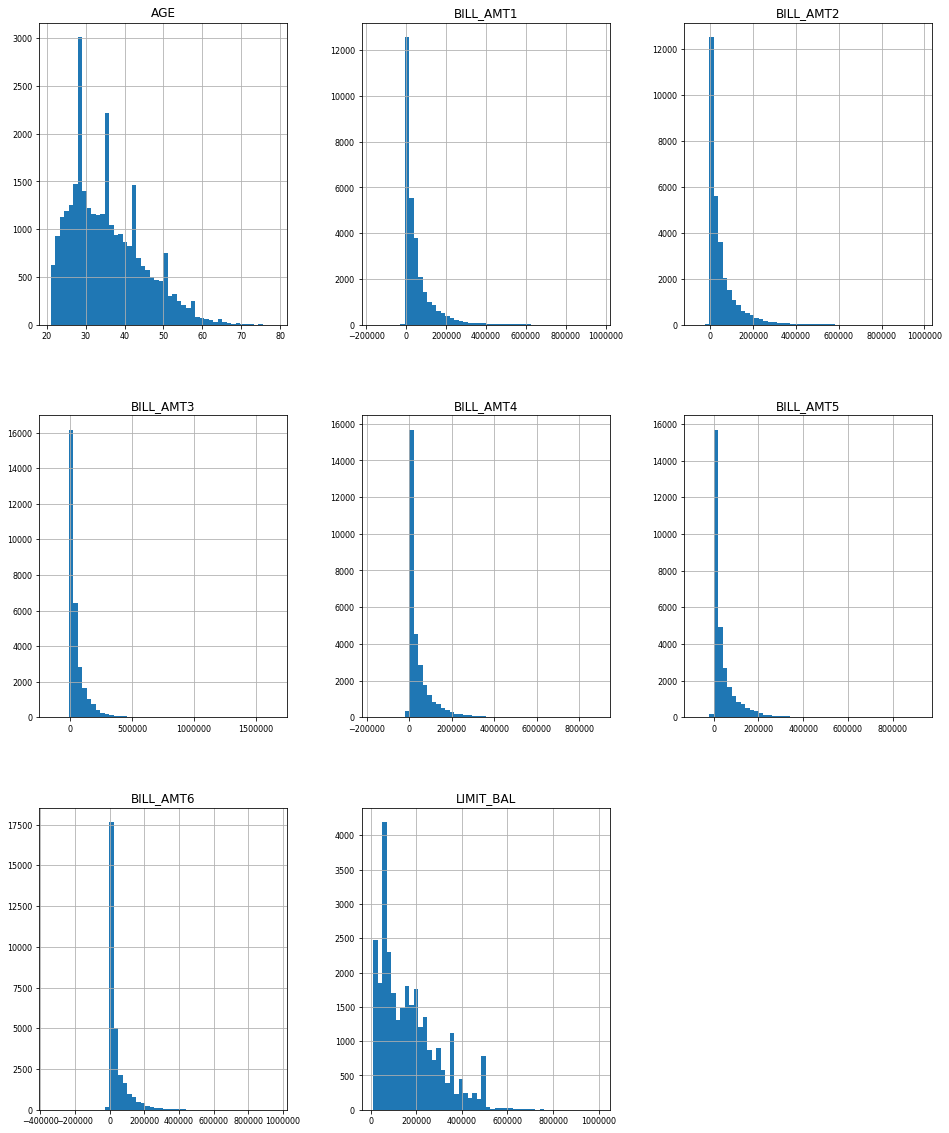

In [5]:
#df_creditcarddata = df_creditcarddata.drop("ID", axis= 1) #ID not needed

df_creditcarddata[['default.payment.next.month']].describe()


# Look at histograms of speccific columns
selected_columns = df_creditcarddata[['AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3',
                                      'BILL_AMT4','BILL_AMT5','BILL_AMT6', 'LIMIT_BAL']]

selected_columns.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

plt.show()














Text(0, 0.5, '# Payment Defaults')

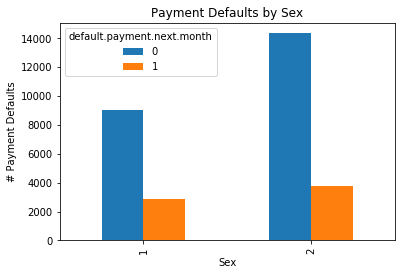

In [6]:
pd.crosstab(df_creditcarddata["SEX"], 
            df_creditcarddata["default.payment.next.month"]).plot(kind='bar', stacked=False) 
plt.title('Payment Defaults by Sex')
plt.xlabel('Sex')
plt.ylabel('# Payment Defaults')



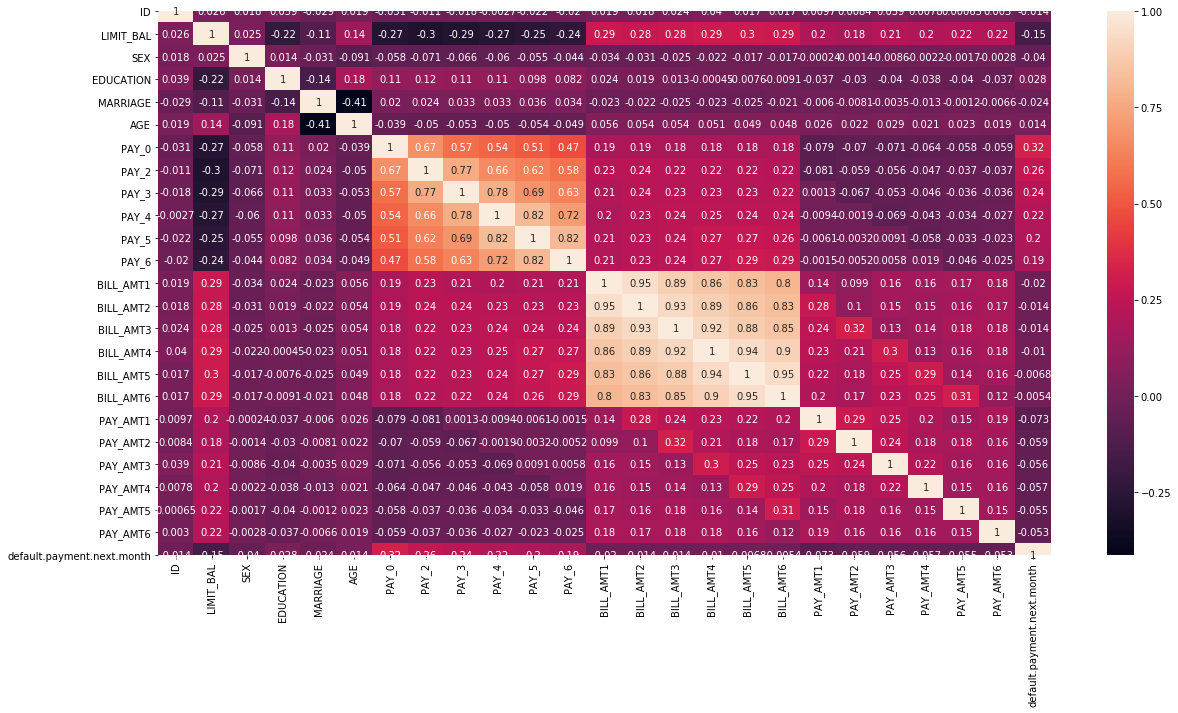

In [7]:
df_creditcarddata.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df_creditcarddata.corr(), annot=True)
plt.show()

In [8]:
# Assigning labels to features to make interpretation easier

GenderMap = {2:'female', 1:'male'}
MarriageMap = {1:'married', 2:'single', 3:'other', 0: 'other'}
EducationMap = {1:'graduate school', 2:'university', 3:'high school', 4:'others',
                5:'unknown', 6:'unknown', 0:'unknown'}


df_creditcarddata['SEX'] = df_creditcarddata.SEX.map(GenderMap)
df_creditcarddata['MARRIAGE'] = df_creditcarddata.MARRIAGE.map(MarriageMap) 
df_creditcarddata['EDUCATION'] = df_creditcarddata.EDUCATION.map(EducationMap)
df_creditcarddata['PAY_0'] = df_creditcarddata['PAY_0'].astype(str) 
df_creditcarddata['PAY_2'] = df_creditcarddata['PAY_2'].astype(str) 
df_creditcarddata['PAY_3'] = df_creditcarddata['PAY_3'].astype(str) 
df_creditcarddata['PAY_4'] = df_creditcarddata['PAY_4'].astype(str) 
df_creditcarddata['PAY_5'] = df_creditcarddata['PAY_5'].astype(str) 
df_creditcarddata['PAY_6'] = df_creditcarddata['PAY_6'].astype(str)

df_creditcarddata.dtypes














ID                              int64
LIMIT_BAL                     float64
SEX                            object
EDUCATION                      object
MARRIAGE                       object
AGE                             int64
PAY_0                          object
PAY_2                          object
PAY_3                          object
PAY_4                          object
PAY_5                          object
PAY_6                          object
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [9]:
# Split the target variables
predictor= df_creditcarddata.iloc[:, df_creditcarddata.columns != 'default.payment.next.month']
target= df_creditcarddata.iloc[:, df_creditcarddata.columns == 'default.payment.next.month']

# save all categorical columns in list
categorical_columns = [col for col in predictor.columns.values
                       if predictor[col].dtype == 'object']
#print(categorical_columns)
# dataframe with categorical features
df_categorical = predictor[categorical_columns]


df_categorical.head()
# dataframe with numerical features
df_numeric = predictor.drop(categorical_columns, axis=1)
df_numeric.head()

# Using pandas.get_dummies function to Convert categorical variable into dummy/indicator variables
dummy_code_cat_vars  = pd.get_dummies(df_categorical,drop_first=True)

dummy_code_cat_vars.head()





,SEX_male,EDUCATION_high school,EDUCATION_others,EDUCATION_university,EDUCATION_unknown,MARRIAGE_other,MARRIAGE_single,PAY_0_-2,PAY_0_0,PAY_0_1,...,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [10]:
df_predictor = pd.concat([df_numeric,dummy_code_cat_vars],axis=1)
df_predictor.head()








,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,2,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,0,0,1,0,0,0,0,0,0,0
3,4,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,0,0,1,0,0,0,0,0,0,0
4,5,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_predictor, target, 
                                                    test_size=0.3, random_state=0)
print("x_train ",X_train.shape)
print("x_test ",X_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)



x_train  (21000, 80)
x_test  (9000, 80)
y_train  (21000, 1)
y_test  (9000, 1)


In [12]:

# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

X_train_scaled.columns = X_train.columns.values
X_test_scaled.columns = X_test.columns.values
X_train_scaled.index = X_train.index.values
X_test_scaled.index = X_test.index.values 

X_train = X_train_scaled
X_test = X_test_scaled
X_train.describe()


,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
count,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,...,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04
mean,9.102771e-17,1.685728e-16,-1.474059e-16,-9.231769e-17,1.421614e-17,6.119972e-17,-9.277499e-17,5.601339e-18,-3.129507e-17,7.833020e-17,...,-4.323801e-16,6.050134e-16,1.692297e-16,9.675964e-16,-3.887842e-16,-9.955661e-17,-1.267034e-15,3.204064e-16,1.677641e-15,-4.323801e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,...,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.730626e+00,-1.218085e+00,-1.574046e+00,-2.966064e+00,-1.684023e+00,-2.947879e+00,-1.949766e+00,-1.688711e+00,-6.403662e+00,-3.345346e-01,...,-6.900820e-03,-4.374405e-01,-1.083992e+00,-3.231863e-01,-8.367231e-02,-3.782347e-02,-2.182699e-02,-2.289288e-02,-4.027000e-02,-6.900820e-03
25%,-8.643146e-01,-9.083058e-01,-8.118788e-01,-6.515623e-01,-6.534728e-01,-6.399233e-01,-6.394048e-01,-6.390978e-01,-6.359415e-01,-2.763876e-01,...,-6.900820e-03,-4.374405e-01,-1.083992e+00,-3.231863e-01,-8.367231e-02,-3.782347e-02,-2.182699e-02,-2.289288e-02,-4.027000e-02,-6.900820e-03
50%,-3.265810e-03,-2.113037e-01,-1.585929e-01,-3.951950e-01,-3.971567e-01,-3.887072e-01,-3.779468e-01,-3.684667e-01,-3.668614e-01,-2.104089e-01,...,-6.900820e-03,-4.374405e-01,9.225160e-01,-3.231863e-01,-8.367231e-02,-3.782347e-02,-2.182699e-02,-2.289288e-02,-4.027000e-02,-6.900820e-03
75%,8.655326e-01,5.631432e-01,6.035739e-01,2.231105e-01,2.137045e-01,1.921694e-01,1.740212e-01,1.645270e-01,1.747845e-01,-3.876078e-02,...,-6.900820e-03,-4.374405e-01,9.225160e-01,-3.231863e-01,-8.367231e-02,-3.782347e-02,-2.182699e-02,-2.289288e-02,-4.027000e-02,-6.900820e-03
max,1.738900e+00,4.900046e+00,4.305527e+00,9.516183e+00,9.847500e+00,2.333770e+01,1.040297e+01,9.088150e+00,1.118749e+01,5.129892e+01,...,1.449103e+02,2.286025e+00,9.225160e-01,3.094191e+00,1.195139e+01,2.643861e+01,4.581484e+01,4.368170e+01,2.483238e+01,1.449103e+02


In [13]:
# Biuld the random forest classifier and estimate
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=0, n_estimators=100,\
                                   criterion = 'entropy', max_leaf_nodes=30,n_jobs=-1)
model_RF = classifier.fit(X_train, y_train)

# WIthin test sample accuracy
acc_train_rf = round(classifier.score(X_train, y_train),2)*100
print(" Model accuracy within training data is : " +  str(acc_train_rf) +"%")









C:\Users\kkris\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


 Model accuracy within training data is : 82.0%


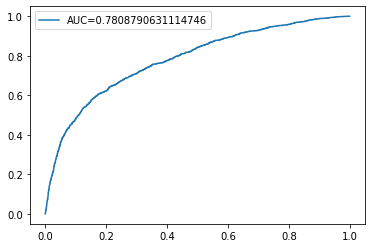

In [14]:
from sklearn import metrics

y_pred_proba = model_RF.predict_proba(X_test)[:,1]
#print(y_pred_proba)

fpr, tpr,t = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend()
plt.show()



In [15]:
from sklearn.metrics import classification_report
y_pred_RF =model_RF.predict(X_test)
print(classification_report(y_test,y_pred_RF))


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7060
           1       0.68      0.29      0.41      1940

    accuracy                           0.82      9000
   macro avg       0.76      0.63      0.65      9000
weighted avg       0.80      0.82      0.79      9000



[[6796  264]
 [1375  565]]


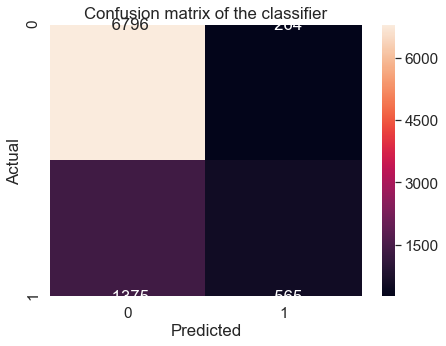

In [16]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred_RF)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
plt.figure(figsize=(7,5))
sns.set(font_scale=1.4)
sns.heatmap(cf_df,annot=True,fmt='5.0f')
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


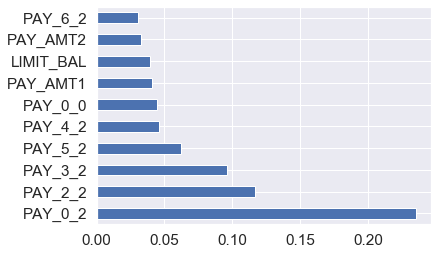

In [17]:
# Get feature importances
feature_importances = pd.Series(classifier.feature_importances_,index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

AdaBoost = AdaBoostClassifier(n_estimators=100, 
                              base_estimator=DecisionTreeClassifier(max_depth=1),
                              random_state=0)

model_AB=AdaBoost.fit(X_train,y_train)




C:\Users\kkris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:



# train accuracy
acc_adaboost = round(AdaBoost.score(X_train, y_train) * 100, 2)
print("Model accuracy in the training sample is: ", acc_adaboost, "%")



Model accuracy in the training sample is:  81.93 %


In [20]:
from sklearn.metrics import classification_report
y_pred_AB =model_AB.predict(X_test)
print(classification_report(y_test,y_pred_AB))


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7060
           1       0.66      0.34      0.45      1940

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000



[[6724  336]
 [1276  664]]


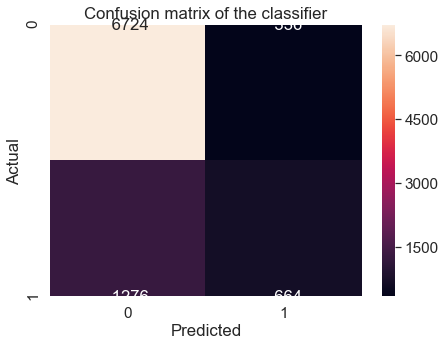

In [21]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred_AB)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
plt.figure(figsize=(7,5))
sns.set(font_scale=1.4)
sns.heatmap(cf_df,annot=True,fmt='5.0f')
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [22]:
# Implement XGboost
#!pip install xgboost
from xgboost import XGBClassifier

xg_model = XGBClassifier()
xg_model.fit(X_train,y_train)

# train accuracy
acc_xgboost = round(xg_model.score(X_train, y_train) * 100, 2)
print("Model accuracy in training sample is: ", acc_xgboost, "%")

# test accuracy
acc_xgboost_test = round(xg_model.score(X_test, y_test) * 100, 2)
print("Model accuracy in test sample is: ", acc_xgboost_test, "%")




C:\Users\kkris\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kkris\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy in training sample is:  82.5 %
Model accuracy in test sample is:  82.24 %


In [23]:
from sklearn.metrics import classification_report
y_pred_xg =xg_model.predict(X_test)
print(classification_report(y_test,y_pred_xg))


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7060
           1       0.67      0.35      0.46      1940

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



[[6728  332]
 [1266  674]]


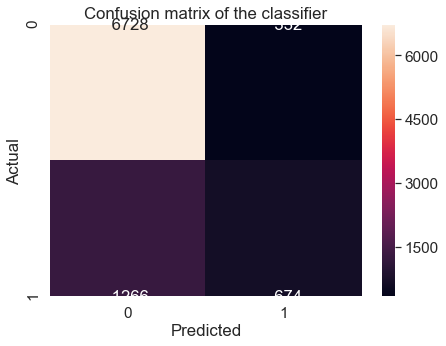

In [24]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred_xg)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
plt.figure(figsize=(7,5))
sns.set(font_scale=1.4)
sns.heatmap(cf_df,annot=True,fmt='5.0f')
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
#SVM
from sklearn import svm

model_svc = svm.SVC()
model_svc_fit = model_svc.fit(X_train,y_train)


# train accuracy
acc_svc = round(model_svc_fit.score(X_train, y_train) * 100, 2)
print("Model accuracy in training sample is: ", acc_svc, "%")

# test accuracy
acc_svc_test = round(model_svc_fit.score(X_test, y_test) * 100, 2)
print("Model accuracy in test sample is: ", acc_svc_test, "%")







C:\Users\kkris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kkris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Model accuracy in training sample is:  82.7 %
Model accuracy in test sample is:  82.4 %


In [28]:
# Tune the hyperparameters of the RF estimator
from sklearn.ensemble import RandomForestClassifier

 #before HP tuning
#classifier = RandomForestClassifier(random_state=0, n_estimators=100,\                                 criterion = 'entropy', max_leaf_nodes=30,n_jobs=-1)
#model_RF = classifier.fit(X_train, y_train)

# With HPP tuning
# Create the HP grid

from sklearn.model_selection import GridSearchCV

param_grid_new = {
    'bootstrap':[True],
    'max_depth':[80,90],
    'max_features':[2],
    'min_samples_leaf':[3,4],
    'min_samples_split':[8,10],
    'n_estimators':[100]
}

# Create a RF model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_new, cv=3, verbose=1)

#Fir the grid search model to data
grid_search_rf.fit(X_train,y_train)
grid_search_rf.best_params_















Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\kkris\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkris\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkris\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kkris\Anaconda3\lib\site-packages\sklear

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [30]:
best_grid = grid_search_rf.best_estimator_
print("Grid search accuracy:", round(best_grid.score(X_train, y_train) * 100, 2),"%" )

print("Test sample Grid search accuracy:", round(best_grid.score(X_test, y_test) * 100, 2),"%" )


Grid search accuracy: 82.15 %
Test sample Grid search accuracy: 80.63 %
